Task 1:-

    LP1: Implementing SVM for 3 kernels (Linear, 3rd Order Polynomial and RBF)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randint
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import learning_curve
import copy


dig1 = 1

train = np.loadtxt("ZipDigits.train",delimiter=" ",usecols=range(0, 257))
test = np.loadtxt("ZipDigits.test",delimiter=" ",usecols=range(0, 257))

fil_train = []
fil_test = []

fil_train = train[(train[:, 0] == dig1) | (train[:, 0] != dig1)]
fil_test = test[(test[:, 0] == dig1) | (test[:, 0] != dig1)]

fil_train[:, 0] = np.where(fil_train[:, 0] == 1, dig1, -1)
fil_test[:, 0] = np.where(fil_test[:, 0] == 1, dig1, -1)

In [2]:
df_train = pd.DataFrame(fil_train)
df_test = pd.DataFrame(fil_test)

In [3]:
intensities_dig1 = []
intensities_dig2 = []
symmetry_dig1 = []
symmetry_dig2 = []
intensities = []
symmetry = []
y = [] 

for i in range(df_train.shape[0]):
        pix = np.array(df_train.iloc()[i])
        avg = np.mean(pix[1:])
        arr = np.array(pix[1:])
        image_2d = arr.reshape(16, 16)
        upper_half = image_2d[:8,:]
        lower_half = image_2d[8:,:]
        lower_half_flipped = np.flipud(lower_half)
        avg1 = np.mean(np.absolute(upper_half - lower_half_flipped))
        intensities.append(avg)
        symmetry.append(avg1)
        if(df_train[0][i]==1):
            intensities_dig1.append(avg)
            symmetry_dig1.append(avg1)
            y.append(1)
        else:
            intensities_dig2.append(avg)
            symmetry_dig2.append(avg1)
            y.append(-1)
        
labels = np.where(df_train[0]==1, "red", "blue")
df_train.insert(0,"Labels",labels)
df_train.insert(0,"y",y)
df_train.insert(0,"x2",symmetry)
df_train.insert(0,"x1",intensities)
df_train.insert(0,"x0",[1]*df_train.shape[0])

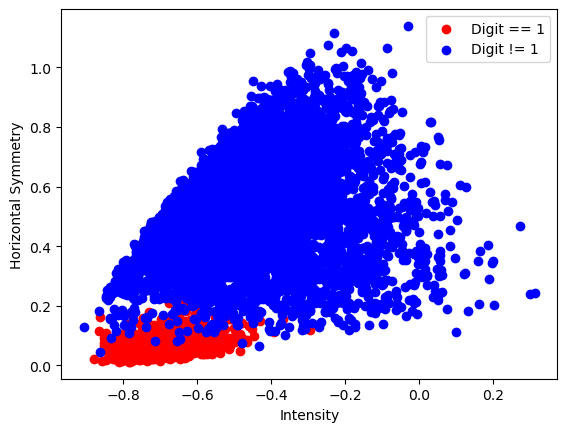

In [4]:
plt.scatter(intensities_dig1, symmetry_dig1, c="red", label="Digit == {}".format(dig1))
plt.scatter(intensities_dig2, symmetry_dig2, c="blue", label="Digit != {}".format(dig1))

plt.xlabel("Intensity")
plt.ylabel("Horizontal Symmetry")
plt.legend()
plt.show()

In [5]:
X_train = df_train.iloc[:,:3].to_numpy()
y_train = df_train.iloc[:,3].to_numpy()

In [6]:
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)

poly_svm = SVC(kernel='poly', degree=3, C=1)
poly_svm.fit(X_train, y_train)

rbf_svm = SVC(kernel='rbf', C=1)
rbf_svm.fit(X_train, y_train)

y_train_pred_linear = linear_svm.predict(X_train)
y_train_pred_poly = poly_svm.predict(X_train)
y_train_pred_rbf = rbf_svm.predict(X_train)

train_error_linear = 1 - accuracy_score(y_train, y_train_pred_linear)
train_error_poly = 1 - accuracy_score(y_train, y_train_pred_poly)
train_error_rbf = 1 - accuracy_score(y_train, y_train_pred_rbf)

In [7]:
print("Training Error (Linear Kernel):", train_error_linear * 100, "%")
print("Training Error (Polynomial Kernel):", train_error_poly * 100, "%")
print("Training Error (RBF Kernel):", train_error_rbf * 100, "%")

Training Error (Linear Kernel): 1.1795364147579201 %
Training Error (Polynomial Kernel): 1.1109587162254853 %
Training Error (RBF Kernel): 1.0698120971060265 %


    HP1: No, training error alone is not a reliable indicator of model performance. On new, unseen data the performance may     differ. To make sure good performance accross the whole data Cross-validation or validation set is used.

Task 2:-
    
    LP1: 5 KFold Cross validation for Kernels: linear, 3 rd order polynomial, RBF with C: 0.01, 0.1, 1, 10, 100.

In [8]:
c_arr = [0.01, 0.1, 1, 10, 100]

best_error = {"Linear": [float('inf'), 0], "Poly": [float('inf'), 0], "RBF": [float('inf'), 0]}
best_error_model = {"Linear": [], "Poly": [], "RBF": []}

kf = KFold(n_splits=5, shuffle=True)

for c in c_arr:
    linear_svm = SVC(kernel='linear', C=c)
#     linear_svm.fit(X_train, y_train)

    poly_svm = SVC(kernel='poly', degree=3, C=c)
#     poly_svm.fit(X_train, y_train)

    rbf_svm = SVC(kernel='rbf', C=c)
#     rbf_svm.fit(X_train, y_train)
    
    linear_pred = cross_val_predict(linear_svm, X_train, y_train, cv=kf)
    accuracy_linear = 1- accuracy_score(y_train, linear_pred)
    
    poly_pred = cross_val_predict(poly_svm, X_train, y_train, cv=kf)
    accuracy_poly = 1 - accuracy_score(y_train, poly_pred)
    
    linear_rbf = cross_val_predict(rbf_svm, X_train, y_train, cv=kf)
    accuracy_rbf = 1- accuracy_score(y_train, linear_rbf)

    print(accuracy_linear)
    print(accuracy_poly)
    print(accuracy_rbf)
    print()
    

    if(accuracy_linear < best_error["Linear"][0]):
        best_error["Linear"] = [accuracy_linear, c]
        best_error_model["Linear"] = linear_svm

    if(accuracy_poly < best_error["Poly"][0]):
        best_error["Poly"] = [accuracy_poly, c]
        best_error_model["Poly"] = poly_svm

    if(accuracy_rbf < best_error["RBF"][0]):
        best_error["RBF"] = [accuracy_rbf, c]
        best_error_model["RBF"] = rbf_svm

        
print(best_error)

0.1378411740501989
0.015498559868330819
0.06336579344397197

0.011932519544644027
0.011658208750514376
0.01152105335344944

0.011658208750514376
0.01152105335344944
0.010972431765189916

0.01152105335344944
0.010012343985735805
0.010012343985735805

0.011658208750514376
0.00891510080921687
0.009189411603346631

{'Linear': [0.01152105335344944, 10], 'Poly': [0.00891510080921687, 100], 'RBF': [0.009189411603346631, 100]}


    LP2: The best kernel and C value are

In [9]:
mod = min(best_error, key=best_error.get)
print(mod)
print("The best Kernel is {}, the C value is {} and the best minimum error is {}".format(mod, best_error[mod][1], best_error[mod][0]))

Poly
The best Kernel is Poly, the C value is 100 and the best minimum error is 0.00891510080921687


In [10]:
best_error

{'Linear': [0.01152105335344944, 10],
 'Poly': [0.00891510080921687, 100],
 'RBF': [0.009189411603346631, 100]}

    HP1: Plotting the in-sample error and the cross validation error.

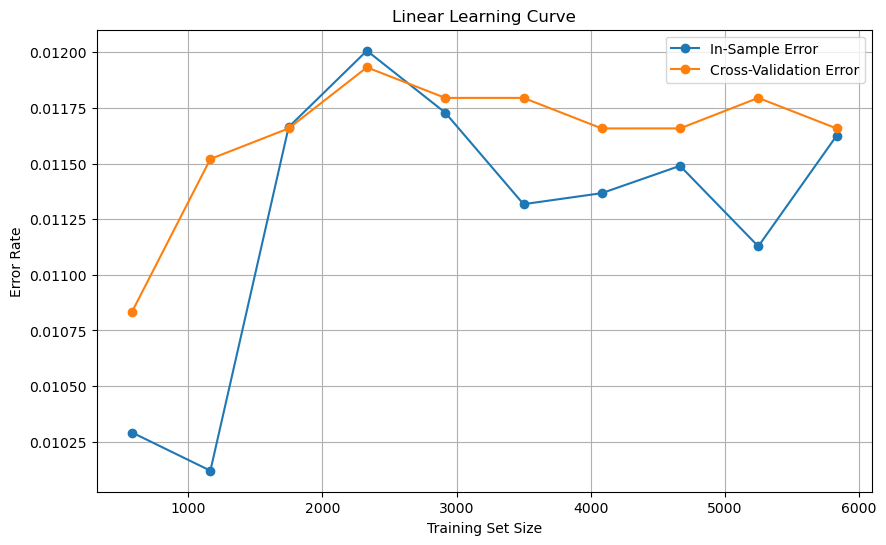

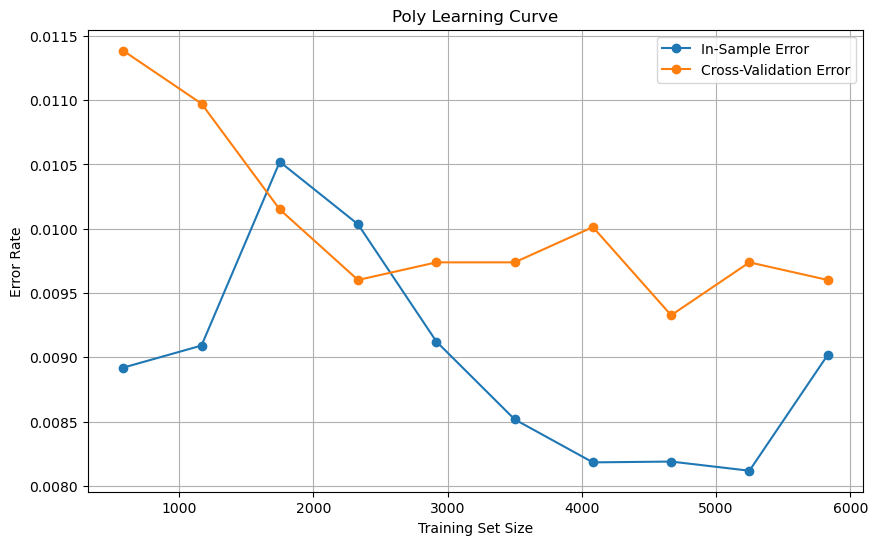

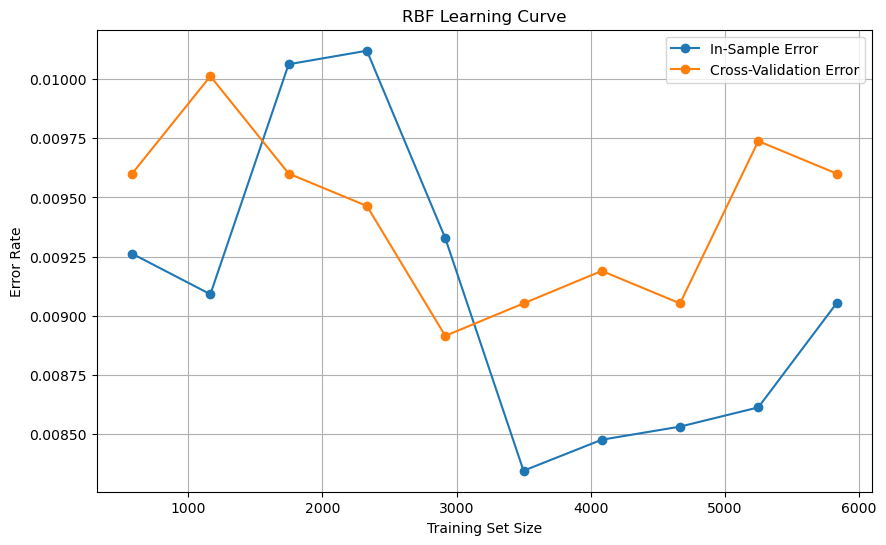

In [11]:
def plot_learning_curve(model, X, y, cv, train_sizes, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy'
    )

    train_errors = 1 - np.mean(train_scores, axis=1)
    test_errors = 1 - np.mean(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='In-Sample Error', marker='o')
    plt.plot(train_sizes, test_errors, label='Cross-Validation Error', marker='o')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('Error Rate')
    plt.legend()
    plt.grid(True)
    plt.show()


train_sizes = np.linspace(0.1, 1.0, 10)
plot_learning_curve(best_error_model["Linear"], X_train, y_train, kf, train_sizes, "Linear Learning Curve")
plot_learning_curve(best_error_model["Poly"], X_train, y_train, kf, train_sizes, "Poly Learning Curve")
plot_learning_curve(best_error_model["RBF"], X_train, y_train, kf, train_sizes, "RBF Learning Curve")

    1. Linear Learning Curve: At first, the in-sample error was very low, and it got closer to the cross-validation error as we used more data. Yet, the cross-validation error, even though higher than before, shows that the model is not fitting the data well, indicating it might be too simple for the dataset.
    
    2. Polynomial Learning Curve Insights: At the start, the cross-validation error was high, but it went down as we added more points. This suggests that our model is getting better at predicting new data. In the end, the difference between the two errors is very small, showing that this model is doing well and is considered acceptable.
    
    3. RBF Learning Curve Findings: At the beginning, the model is learning nicely. However, as we add more points, we notice a problem called overfitting, where the cross-validation error starts to differ more from the in-sample error. In the end, though, the gap between the errors becomes very small, indicating that the model is okay and performs acceptably.

Task 3:-

    LP1: Training the best model on the whole dataset.

In [12]:
rbf_svm = SVC(kernel='rbf', C=100)
rbf_svm.fit(X_train, y_train)
y_pred = rbf_svm.predict(X_train)
train_error = 1 - accuracy_score(y_train, y_pred)
train_error

0.009052256206281695

    LP2: Final Test Error for the SVM using the parameters chosen from LP1

In [13]:
intensities_dig1 = []
intensities_dig2 = []
symmetry_dig1 = []
symmetry_dig2 = []
intensities = []
symmetry = []
y = [] 

for i in range(df_test.shape[0]):
        pix = np.array(df_test.iloc()[i])
        avg = np.mean(pix[1:]) 
        arr = np.array(pix[1:])
        image_2d = arr.reshape(16, 16)
        upper_half = image_2d[:8,:]
        lower_half = image_2d[8:,:]
        lower_half_flipped = np.flipud(lower_half)
        avg1 = np.mean(np.absolute(upper_half - lower_half_flipped))
        intensities.append(avg)
        symmetry.append(avg1)
        if(df_test[0][i]==1):
            intensities_dig1.append(avg)
            symmetry_dig1.append(avg1)
            y.append(1)
        else:
            intensities_dig2.append(avg)
            symmetry_dig2.append(avg1)
            y.append(-1)
        
labels = np.where(df_test[0]==1, "red", "blue")
df_test.insert(0,"Labels",labels)
df_test.insert(0,"y",y)
df_test.insert(0,"x2",symmetry)
df_test.insert(0,"x1",intensities)
df_test.insert(0,"x0",[1]*df_test.shape[0])

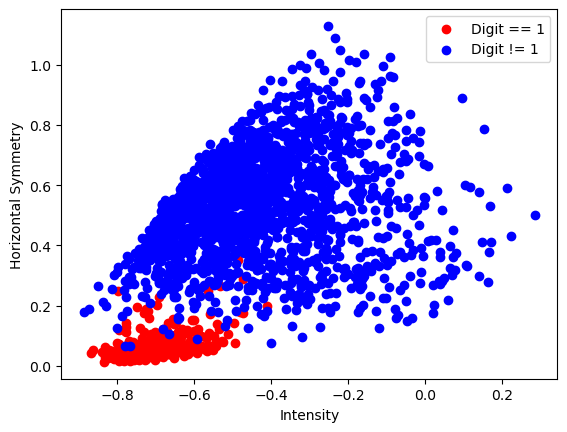

In [14]:
plt.scatter(intensities_dig1, symmetry_dig1, c="red", label="Digit == {}".format(dig1))
plt.scatter(intensities_dig2, symmetry_dig2, c="blue", label="Digit != {}".format(dig1))

plt.xlabel("Intensity")
plt.ylabel("Horizontal Symmetry")
plt.legend()
plt.show()

In [15]:
X_test = df_test.iloc[:,:3]
y_test = df_test.iloc[:,3]

In [16]:
y_pred = rbf_svm.predict(X_test)
test_error_svm_rbf = 1 - accuracy_score(y_test, y_pred)
print("Error Percent on the test dataset of the best model", test_error_svm_rbf * 100)

Error Percent on the test dataset of the best model 1.6940707523667164


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Task 4:

    HP1: Comparing PLA, pocket, pocket with 3rd order polynomial feature transform, SVM, and neural network trained 

In [17]:
all_models_test_errors = {}
all_models_test_errors["SVM RBF"] = test_error_svm_rbf*100

In [18]:
data = pd.DataFrame(df_train.iloc[:,:4])
data_train = data

def plot_graph(w, tit):
    axes = plt.gca()
    color = np.where(data["y"]==1, "red", "blue")
    plt.scatter(list(data['x1']), list(data['x2']), c=color)

    x_vals = np.array(axes.get_xlim())
    y_vals = []
    for i in x_vals:
        y = -w[0]/w[2] - (w[1]/w[2] * i)
        y_vals.append(y)
    plt.plot(x_vals, y_vals, '--')
    plt.title(tit)
    plt.show()

In [19]:
def check_missing_points(w):
    X = data[['x0', 'x1', 'x2']].values
    hypo_y = np.sign(np.dot(X, w))
    mismatched_indices = np.where(hypo_y != data["y"].values)[0]
    return mismatched_indices.tolist()

def pocket_algo(w):
    global max_itr
    w_best = tuple(w)
    miss_points = tuple(check_missing_points(w_best))
    w_best_points = len(miss_points)
    print(w_best_points)
    l_data = len(data)
    #Ein = []
    n = max_itr # maxnumber of iterations
    out_itr = n
    for i in range(n):
        j = miss_points[0]
        w[0] = w[0] + data["y"][j]*data["x0"][j]
        w[1] = w[1] + data["y"][j]*data["x1"][j]
        w[2] = w[2] + data["y"][j]*data["x2"][j]
        
        miss_points = tuple(check_missing_points(w))
        w_points = len(miss_points)
        #Ein.append(w_best_points/l_data)

        if(w_points < w_best_points):
            w_best = tuple(w)
            w_best_points = w_points
            out_itr = i
        
        if(w_points == 0):
            w_best = tuple(w)
            w_best_points = w_points
            break

    plot_graph(w_best, "Pocket Algorithm")
    print("Final Weights (Pocket):",w_best, "Number of Missclassified points:", w_best_points, "Got Final Weights at iteration", out_itr)
    print("In Sample Error is", w_best_points/l_data*100, "%")
    return w_best

In [20]:
def check_miss_points(w):
    
    X = data[['x0', 'x1', 'x2']].values
    hypo_y = np.sign(np.dot(X, w))
    mismatched_indices = np.where(hypo_y != data["y"].values)[0]
    miss_list = mismatched_indices.tolist()
    len_miss_list = len(miss_list)
    if(len_miss_list>0):
        return True, miss_list[0]
    else:
        return False, -10

def perceptron_algo(w):
    flag, p_miss = check_miss_points(w)
    i = 0
    while flag:
        w[0] = w[0] + data["y"][p_miss]*data["x0"][p_miss]
        w[1] = w[1] + data["y"][p_miss]*data["x1"][p_miss]
        w[2] = w[2] + data["y"][p_miss]*data["x2"][p_miss]
        flag, p_miss = check_miss_points(w)
        if(i>1000):
            print("Perceptron Algorithm: The data is not linearly seperable or has some noisy data.")
            break
        i+=1
    plot_graph(w, "Perceptron")
    miss_points = check_missing_points(w)
    print("Final Weights (Perceptron):", w, "iterations:", i, "Number of Missclassified Points:", len(miss_points))
    return w

Perceptron Algorithm: The data is not linearly seperable or has some noisy data.


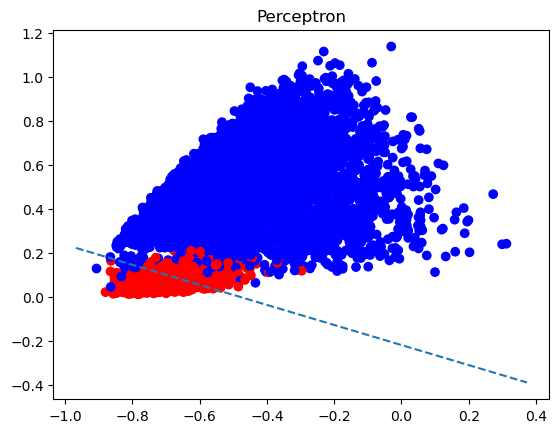

Final Weights (Perceptron): [-2, -4.171175781249788, -9.136507812499866] iterations: 1001 Number of Missclassified Points: 276


In [21]:
w = [0,0,0]
w_final_percep = perceptron_algo(w)
all_models_test_errors["PLA"] = "No Result"

6286


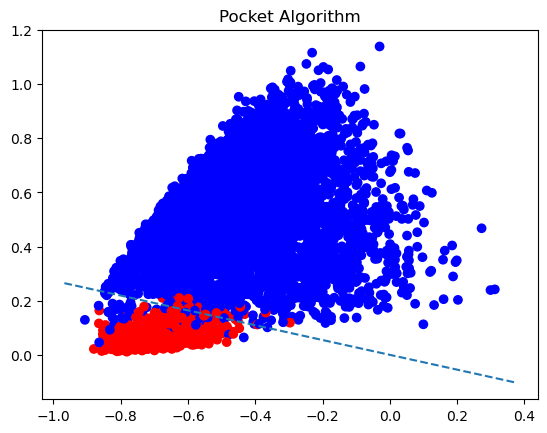

Final Weights (Pocket): (0, -0.5895195312500002, -2.153148437499999) Number of Missclassified points: 86 Got Final Weights at iteration 12
In Sample Error is 1.1795364147579206 %


In [22]:
w = [1,1,1]
max_itr = 1000
w_final_pock = pocket_algo(w)

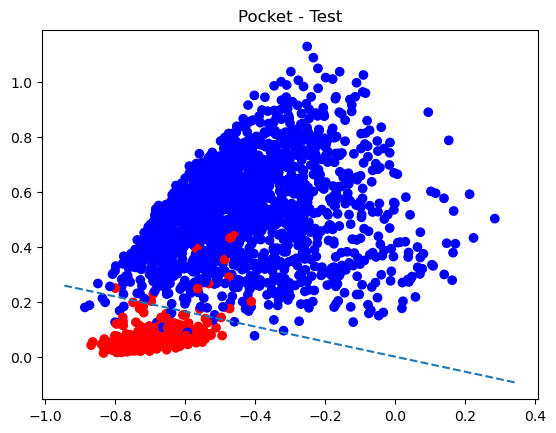

Test data in Sample Error is 1.7438963627304436 %


In [23]:
data = pd.DataFrame(df_test.iloc[:,:4])
data_test = data
plot_graph(w_final_pock, "Pocket - Test")
miss_points = check_missing_points(w_final_pock)
ein_pocket_test = len(miss_points)/len(data)*100
print("Test data in Sample Error is", ein_pocket_test, "%")
all_models_test_errors["Pocket"] = ein_pocket_test

In [24]:
y = list(data_train.iloc[:,-1])
data_train = data_train.iloc[:,:-1]
data_train = data_train.drop(columns="x0")

data_x = np.array(data_train)
data_poly = np.c_[[1]*len(data_x), data_x, data_x[:, 0]**2, data_x[:, 1]**2, data_x[:, 0] * data_x[:, 1], data_x[:, 0]**3, data_x[:, 1]**3, data_x[:, 0]**2*data_x[:, 1], data_x[:, 1]**2*data_x[:, 0]]
data_3d = pd.DataFrame(data_poly)
data_3d.insert(data_3d.shape[1],'y',y)

In [25]:
def plot_Ein(Ein):
    plt.xlabel("Iterations")
    plt.ylabel("Ein (In-Sample Error)")
    plt.title("Ein vs. Iterations for Pocket Algorithm")
    plt.plot(Ein)
    plt.show()

def plot10poly(w, tit, color='red'):
    color_1 = np.where(data_3d["y"]==1, "red", "blue")
    plt.scatter(list(data_3d[1]), list(data_3d[2]), c=color_1)
    axes = plt.gca()
    xlims = axes.get_xlim()
    ylims = axes.get_ylim()
    x1 = np.linspace(xlims[0], xlims[1], 1000)
    x2 = np.linspace(ylims[0], ylims[1], 1000)
    # meshgrid
    XM1, XM2 = np.meshgrid(x1, x2)

    w0 = w[0]
    w1 = w[1]
    w2 = w[2]
    w3 = w[3]
    w4 = w[4]
    w5 = w[5]
    w6 = w[6]
    w7 = w[7]
    w8 = w[8]
    w9 = w[9]
    
    z = w0 + w1*XM1 + w2*XM2 + w3*XM1**2 + w4*XM2**2 + w5*XM1*XM2 + w6*XM1**3 + w7*XM2**3 + w8*XM1**2*XM2 + w9*XM1*XM2**2
    # for i in range(data_3d.shape[1]-1):
    #     z = z + w[i]*data_3d[i]
    plt.contour(XM1, XM2, z, 1, colors = color)
    plt.title(tit)
    plt.show()

def check_missing_points_3d(w):
    X = data_3d.values
    hypo_y = np.sign(np.dot(X[:,:-1], w))
    mismatched_indices = np.where(hypo_y != data_3d["y"].values)[0]
    return mismatched_indices.tolist()

def pocket_algo_3d(w):
    global max_itr
    w_best = tuple(w)
    miss_points = tuple(check_missing_points_3d(w_best))
    w_best_points = len(miss_points)
    l_data = len(data_3d)
    Ein = []
    n = max_itr # maxnumber of iterations
    out_itr = n
    for i in range(n):
        j = miss_points[0]
        
        x = data_3d.iloc[j,:-1]
        y = data_3d.iloc[j,-1]
        w = w + x*y
        
        miss_points = tuple(check_missing_points_3d(w))
        w_points = len(miss_points)
        Ein.append(w_best_points/l_data)
        
        # print(w_best, w_best_points, w, w_points)
        
        if(w_points < w_best_points):
            w_best = tuple(w)
            w_best_points = w_points
            out_itr = i
        
        if(w_points == 0):
            w_best = tuple(w)
            w_best_points = w_points
            break
    plot_Ein(Ein)
    plot10poly(w_best, "Pocket Algorithm 3d")
    print("Final Weights (Pocket):",w_best, "Number of Missclassified points:", w_best_points, ", Got Final Weights at iteration", out_itr)
    print("In sample Error:", w_best_points/len(data_3d)*100,"%")
    return w_best


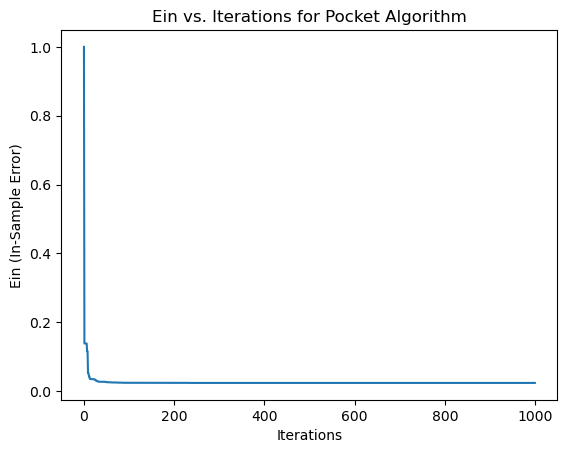

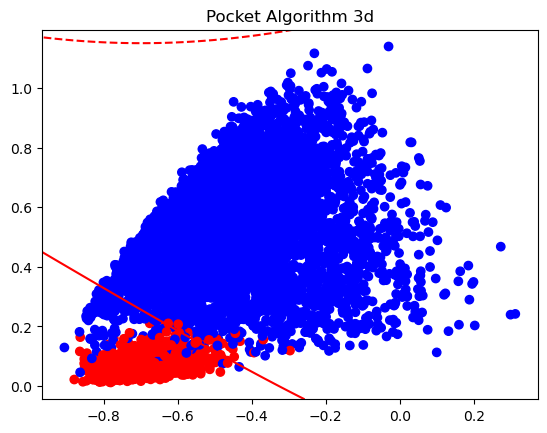

Final Weights (Pocket): (-1.0, -1.8111601562499926, -5.702148437499997, 2.8229444512481523, -2.7270071718139572, 3.589197745635972, -3.001283237201791, -1.1431387697364912, -2.366670059837141, 1.6739318616427337) Number of Missclassified points: 169 , Got Final Weights at iteration 232
In sample Error: 2.3179262103963794 %


In [26]:
max_itr = 1000
w = [0]*10
w_pocket_3d = pocket_algo_3d(w)

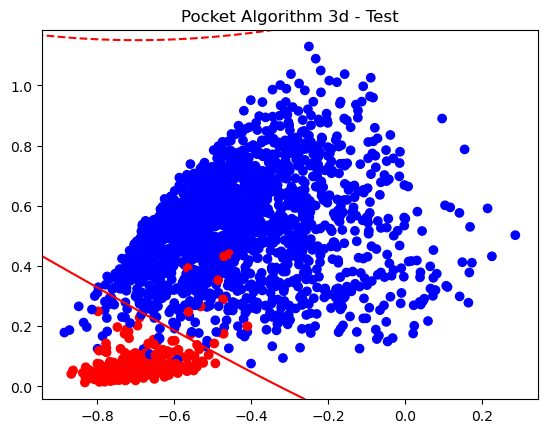

Test data in Sample Error is 2.391629297458894 %
Number of misclassified points: 48


In [27]:
y = list(data_test.iloc[:,-1])
data_test = data_test.iloc[:,:-1]
data_test = data_test.drop(columns="x0")

data_x = np.array(data_test)
data_poly = np.c_[[1]*len(data_x), data_x, data_x[:, 0]**2, data_x[:, 1]**2, data_x[:, 0] * data_x[:, 1], data_x[:, 0]**3, data_x[:, 1]**3, data_x[:, 0]**2*data_x[:, 1], data_x[:, 1]**2*data_x[:, 0]]
data_3d = pd.DataFrame(data_poly)
data_3d.insert(data_3d.shape[1],'y',y)

plot10poly(w_pocket_3d, "Pocket Algorithm 3d - Test")
miss_points = check_missing_points_3d(w_pocket_3d)
ein_pocket_test = len(miss_points)/len(data)*100
print("Test data in Sample Error is", ein_pocket_test, "%")
print("Number of misclassified points:", len(miss_points))

In [28]:
all_models_test_errors["Pocket 3d"] = ein_pocket_test
all_models_test_errors

{'SVM RBF': 1.6940707523667164,
 'PLA': 'No Result',
 'Pocket': 1.7438963627304436,
 'Pocket 3d': 2.391629297458894}

In [29]:
def forwardProp(x0, w_forward):
    global number_of_layers
    s_forward = {}
    x_forward = {}
    x_forward[0] = x0

    for i in range(1,number_of_layers+1,1):
        s = np.dot(np.transpose(w_forward[i]), x_forward[i-1])
        s_forward[i] = s
        x_forward[i] = np.append(np.array([1]), np.array(np.tanh(s)))
        x_forward[i] = x_forward[i].reshape(-1, 1)
        
    return x_forward, s_forward, w_forward

In [30]:
def backwardProp(x_forward, s_forward, w_forward, y, k):
    global number_of_layers
    
    x_backward = copy.deepcopy(x_forward)
    w_backward = copy.deepcopy(w_forward)
    s_backward = copy.deepcopy(s_forward)

    for i in range(len(x_backward)):
        x_backward[i] = x_backward[i][1:]

    for i in range(1,len(w_backward)+1,1):
        w_backward[i] = w_backward[i][1:]
    
    delta_backward = {}
    delta_backward[2] = 2*(x_backward[2]-y[k])*(1-(np.tanh(s_backward[2])**2))
    
    for i in range(number_of_layers-1, 0, -1):
        tanh_deri = 1-(np.tanh(s_backward[i])**2)
        delta_backward[i] = np.multiply(tanh_deri, (w_backward[i+1] * delta_backward[i+1]))
    
    return delta_backward

In [31]:
def gradientDescent(x_forward, delta_backward, N):
    global number_of_layers    
    grad_des = {}
    
    for i in range(1,number_of_layers+1,1):
        grad_des[i] = np.matmul(x_forward[i-1], delta_backward[i].T)
    
    return grad_des

In [32]:
def batchGradientDescent(x_forward, delta_backward, N):
    global number_of_layers    
    grad_des = {}
    
    for i in range(1,number_of_layers+1,1):
        grad_des[i] = np.matmul(x_forward[i-1], delta_backward[i].T)
        grad_des[i] = grad_des[i] + 1/N*grad_des[i]
    
    return grad_des

In [33]:
def updateWeights(w_forward, grad_des, learn_rate):
    for i in range(len(w_forward)):
        w_forward[i+1] = w_forward[i+1] - learn_rate*grad_des[i+1]
    
    return w_forward

In [34]:
x = df_train.iloc[:,:3].to_numpy()
y = df_train.iloc[:,3].to_numpy()

number_of_layers = 2
num_hidden_units = 2
learn_rate = 0.5

np.random.seed(1)
w_forward = {}
w_forward[1] = np.random.randn(x.shape[1], num_hidden_units)
w_forward[2] = np.random.randn(num_hidden_units+1, 1)
e_in_arr = []
epochs = 100 

print(x.shape)

for j in range(epochs):
    e_in = 0
    permutation = np.random.permutation(x.shape[0])
    x_shuf = x[permutation]
    y_shuf = y[permutation]
    
    for i in range(len(x_shuf)):
        x0 = x_shuf[i, :].reshape(-1, 1)
        x_forward, s_forward, w_forward = forwardProp(x0, w_forward)
        
        delta_backward = backwardProp(x_forward, s_forward, w_forward, y_shuf, i)

        N = len(x)
        e_in = e_in + 1/N*((x_forward[number_of_layers][1:] - y_shuf[i])**2)

        grad_des = gradientDescent(x_forward, delta_backward, N)
        w_forward = updateWeights(w_forward, grad_des, learn_rate)
        
    e_in_arr.append(e_in[0]) 

(7291, 3)


In [35]:
x_test = pd.DataFrame(df_test.iloc[:,:3]).to_numpy()
y_test = pd.DataFrame(df_test.iloc[:,3]).to_numpy()

number_of_layers = 2
num_hidden_units = 2
learn_rate = 1
count = 0

np.random.seed(40)
for i in range(len(x_test)):
    x0 = x_test[i, :].reshape(-1, 1)
    x_forward, s_forward, w_forward = forwardProp(x0, w_forward)
    hx = x_forward[2][1][0]
    
    if(np.sign(hx)==np.sign(y_test[i])):
        count+=1
        
print("Accuracy:", str(100*count/len(y_test))+'%')

Accuracy: 86.84603886397609%


In [36]:
all_models_test_errors["Neural Network - SGD"] = 100 - 100*count/len(y_test)
all_models_test_errors

{'SVM RBF': 1.6940707523667164,
 'PLA': 'No Result',
 'Pocket': 1.7438963627304436,
 'Pocket 3d': 2.391629297458894,
 'Neural Network - SGD': 13.15396113602391}

In [37]:
x = df_train.iloc[:,:3].to_numpy()
y = df_train.iloc[:,3].to_numpy()
number_of_layers = 2
num_hidden_units = 2
learn_rate = 0.1

np.random.seed(1)
w_forward = {}
w_forward[1] = np.random.randn(num_hidden_units, x.shape[1]).reshape(-1, 2)
w_forward[2] = np.random.randn(1, num_hidden_units+1).reshape(-1, 1)
e_in_arr = []
epochs = 50000
N = 32

total_grad = {}
for i in range(1,number_of_layers+1,1):
    total_grad[i] = 0

for j in range(epochs):
    e_in = 0
    
    total_grad = {}
    for i in range(1,number_of_layers+1,1):
        total_grad[i] = 0
    
    permutation = np.random.permutation(x.shape[0])
    x_shuf = x[permutation]
    y_shuf = y[permutation]
    
    for i in range(32):
        x0 = x_shuf[i, :].reshape(-1, 1)
        x_forward, s_forward, w_forward = forwardProp(x0, w_forward)
        
        delta_backward = backwardProp(x_forward, s_forward, w_forward, y_shuf, i)
        
        e_in = e_in + 1/N*(x_forward[number_of_layers][1:] - y_shuf[i])**2

        grad_des = batchGradientDescent(x_forward, delta_backward, N)
        
        for k in range(1,number_of_layers+1,1):
            total_grad[k] = total_grad[k] + (1/N*grad_des[k])
    
#         print(i,"GRad", grad_des)
#         print(i, "total", total_grad)
    w_forward = updateWeights(w_forward, total_grad, learn_rate)
        
#     print("In Sample Error", e_in)
    e_in_arr.append(e_in[0]) 

In [38]:
x_test = pd.DataFrame(df_test.iloc[:,:3]).to_numpy()
y_test = pd.DataFrame(df_test.iloc[:,3]).to_numpy()

number_of_layers = 2
num_hidden_units = 2
learn_rate = 1
count = 0

np.random.seed(40)
for i in range(len(x_test)):
    x0 = x_test[i, :].reshape(-1, 1)
    x_forward, s_forward, w_forward = forwardProp(x0, w_forward)
    hx = x_forward[2][1][0]
    
    if(np.sign(hx)==np.sign(y_test[i])):
        count+=1
        
print("Accuracy:", str(100*count/len(y_test))+'%')

Accuracy: 98.10662680617837%


In [39]:
all_models_test_errors["Neural Network - Mini-Batch"] = 100 - 100*count/len(y_test)
all_models_test_errors

{'SVM RBF': 1.6940707523667164,
 'PLA': 'No Result',
 'Pocket': 1.7438963627304436,
 'Pocket 3d': 2.391629297458894,
 'Neural Network - SGD': 13.15396113602391,
 'Neural Network - Mini-Batch': 1.8933731938216312}

In [40]:
x = df_train.iloc[:,:3].to_numpy()
y = df_train.iloc[:,3].to_numpy()
number_of_layers = 2
num_hidden_units = 2
learn_rate = 0.1

np.random.seed(1)
w_forward = {}
w_forward[1] = np.random.randn(num_hidden_units, x.shape[1]).reshape(-1, 2)
w_forward[2] = np.random.randn(1, num_hidden_units+1).reshape(-1, 1)
e_in_arr = []
epochs = 266
N = len(x)

total_grad = {}
for i in range(1,number_of_layers+1,1):
    total_grad[i] = 0

for j in range(epochs):
    e_in = 0
    
    total_grad = {}
    for i in range(1,number_of_layers+1,1):
        total_grad[i] = 0
    
    permutation = np.random.permutation(x.shape[0])
    x_shuf = x[permutation]
    y_shuf = y[permutation]
    
    for i in range(len(x_shuf)):
        x0 = x_shuf[i, :].reshape(-1, 1)
        x_forward, s_forward, w_forward = forwardProp(x0, w_forward)
        
        delta_backward = backwardProp(x_forward, s_forward, w_forward, y_shuf, i)
        
        e_in = e_in + 1/N*(x_forward[number_of_layers][1:] - y_shuf[i])**2

        grad_des = batchGradientDescent(x_forward, delta_backward, N)
        
        for k in range(1,number_of_layers+1,1):
            total_grad[k] = total_grad[k] + (1/N*grad_des[k])
    
#         print(i,"GRad", grad_des)
#         print(i, "total", total_grad)
    w_forward = updateWeights(w_forward, total_grad, learn_rate)
        
#     print("In Sample Error", e_in)
    e_in_arr.append(e_in[0]) 

In [41]:
x_test = pd.DataFrame(df_test.iloc[:,:3]).to_numpy()
y_test = pd.DataFrame(df_test.iloc[:,3]).to_numpy()

number_of_layers = 2
num_hidden_units = 2
learn_rate = 1
count = 0

np.random.seed(40)
for i in range(len(x_test)):
    x0 = x_test[i, :].reshape(-1, 1)
    x_forward, s_forward, w_forward = forwardProp(x0, w_forward)
    hx = x_forward[2][1][0]
    
    if(np.sign(hx)==np.sign(y_test[i])):
        count+=1
        
print("Accuracy:", str(100*count/len(y_test))+'%')

Accuracy: 98.25610363726956%


In [42]:
all_models_test_errors["Neural Network - Batch"] = 100 - 100*count/len(y_test)
all_models_test_errors

{'SVM RBF': 1.6940707523667164,
 'PLA': 'No Result',
 'Pocket': 1.7438963627304436,
 'Pocket 3d': 2.391629297458894,
 'Neural Network - SGD': 13.15396113602391,
 'Neural Network - Mini-Batch': 1.8933731938216312,
 'Neural Network - Batch': 1.743896362730439}

Best result on the test dataset is by SVM with RBF kernel and worst by Neural Network with stochastic gradient. 
- The RBF kernel is known for its ability to capture complex relationships in the data by mapping input features into a higher-dimensional space. 
- Stochastic Gradient Descent (SGD) is an optimization algorithm commonly used for training neural networks. The term "stochastic" indicates that the algorithm updates the model parameters after processing each individual data point.

Task 4:-

    HP2: Is this approach to choose the best digit classifier appropriate?
    While experimenting with multiple models to classify digits is beneficial, our current focus is solely on distinguishing between the digit '1' and not '1'. However, expanding the classification task to include all 10 digits introduces additional complexity. The symmetry and intensity characteristics of different digits may overlap, leading to an ambiguous dataset lacking clear patterns. Relying on results from a single binary classification might not be an optimal approach when the goal is to classify the entire dataset with 10 digits. Therefore, I believe this method may not be suitable for selecting a model that effectively classifies the entire dataset.